# Load Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Fit a Decision Tree to the Iris Data Set

### Use sklearn
### What is the score?

In [5]:
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf.score(iris.data, iris.target)

1.0

In [6]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [7]:
!dot -Tpng iris.dot -o iris.png

![Iris Decision Tree](iris.png)

# Now split the data set into a 50/50 training and testing set. 

* What is the score on the training set?
* What is the score on the test set?

In [8]:
from sklearn.cross_validation import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [9]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("Training Score: {}".format(clf.score(X_train, y_train)))
print("Test Score: {}".format(clf.score(X_test, y_test)))

Training Score: 1.0
Test Score: 0.96


# What do you think happened?

In [10]:
from sklearn.externals.six import StringIO
with open("iris2.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [11]:
!dot -Tpng iris2.dot -o iris2.png

![Iris Decision Tree 2](iris2.png)

# We can also use trees to get feature importance

In [12]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
clf.score(iris.data, iris.target)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("{} feature {}, {}, ({})".format(f + 1, indices[f], iris.feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1 feature 2, petal length (cm), (0.550722624799)
2 feature 3, petal width (cm), (0.422610708535)
3 feature 0, sepal length (cm), (0.0266666666667)
4 feature 1, sepal width (cm), (0.0)


# SKLearn Examples

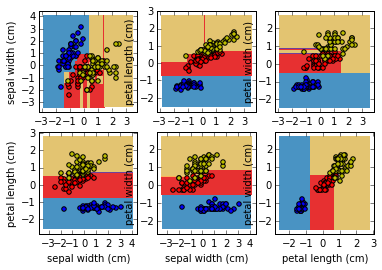

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")


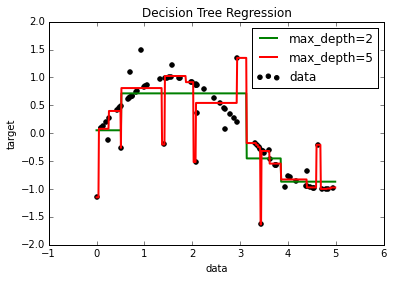

In [14]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=5)
clf_1.fit(X, y)
clf_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

# Let's get some practice on the Titanic data set

* Read in the titanic data set 
* Set a variable, y_titanic, to the values in Survived
* Set a variable, X_titanic, to the variables
    1. Pclass
    2. Sex
    3. Age
    4. SibSp
    5. Parch
    6. Fare
    7. Cabin
    8. Embarked
* print the first 5 rows

In [15]:
titanic = pd.read_csv('/Users/mike/Documents/General Assembly/DAT_ATL_15/Datasets/titanic_train.csv')

In [108]:
titanic.head()
y_titanic = np.array(titanic['Survived'])
X_titanic = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]

In [109]:
X_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22,1,0,7.2500,NaN,S
1,1,female,38,1,0,71.2833,C85,C
2,3,female,26,0,0,7.9250,NaN,S
3,1,female,35,1,0,53.1000,C123,S
4,3,male,35,0,0,8.0500,NaN,S


### What percentage of Cabin is NaN?

In [110]:
1.0*X_titanic['Cabin'].notnull().sum()/len(np.array(X_titanic['Cabin']))

0.22895622895622897

### Remove the column cabin

In [111]:
#Let's remove cabin
del X_titanic['Cabin']

### Do the following

* Encode females as 0 and males as 1
* Fill the missing age values with the median
* Create dummie columns for Embarked

In [112]:
# encode female as 0 and male as 1
X_titanic['Sex'] = X_titanic.Sex.map({'female':0, 'male':1})

/Users/mike/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [113]:
# fill in the missing values for age with the median age
X_titanic.Age.fillna(X_titanic.Age.median(), inplace=True)
X_titanic = pd.get_dummies(X_titanic, columns=['Embarked'])

### Split into a 50/50 train, test split and train a DT with the default settings. What ist he training and testing error?

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic.values, y_titanic, test_size=0.5, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("Training Score: {}".format(clf.score(X_train, y_train)))
print("Test Score: {}".format(clf.score(X_test, y_test)))

Training Score: 0.984269662921
Test Score: 0.730941704036


In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, clf.predict(X_train))

array([[265,   1],
       [  6, 173]])

### What do you think this means?

### What now?

### Try adjusting the paramters and see if you can get better.

pseudocode


Grow tree(S) 

    if y == 0 for all (x,y) in S return new leaf(0)
    
    elif y==1 for all (x,y) in S return new lear(1)
    
    else:
    
        choose best attribute x_j
        
        S_0 = all (x,y) with x_j = 0
        
        S_1 = all (x,y) with x_j = 1
        
        return new node(x_j, Growtree(S_0), Growtree(S_1))

### Choosing Best Attribute PseudoCode

ChooseBestAttribute(S)

choos j to minimiza J_j computed as follows

    S_0 = al (x,y) in S with x_j = 0

    S_1 = all (x,y) in S with x_j = 1

    y_0 = the most common value of y in S_0

    y_1 = the m ost common value of y in S_1

    J_0 = number of examples (x, y)  in _0 with y <> y_0

    J_1 = number of examples (x,y) in S_1 with y<> Y_1

    J_j = J_0 + J_1 (total errors if we split on this feature)

return j